In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

In [118]:
df_battery = pd.read_csv('battery1.csv')

In [119]:
df_battery[['DeviceManufacturer','DeviceModel','Level']].head()

,DeviceManufacturer,DeviceModel,Level
0,Apple,"iPhone12,3",21.0
1,Apple,"iPhone12,3",21.0
2,Apple,"iPhone12,3",20.0
3,Apple,"iPhone12,3",20.0
4,Apple,"iPhone12,3",20.0


In [120]:
df_battery['cal_column'] = df_battery['Minute'].astype(str) + df_battery['Second'].astype(str)
df_battery[['cal_column']].head()

,cal_column
0,2658.54969200000001
1,273.550294
2,278.549432000000001
3,2712.17356
4,2713.550485


In [121]:
df_vijay = df_battery[['DeviceModel','Timestamp','Level','Minute','Second']].query('DeviceModel == \'a7y18lte\'')
df_sunil = df_battery[['DeviceModel','Timestamp','Level','Minute','Second']].query('DeviceModel == \'iPhone12,3\'')
df_soumya = df_battery[['DeviceModel','Timestamp','Level','Minute','Second']].query('DeviceModel == \'iPhone11,6\'')


df_sunil.head()

,DeviceModel,Timestamp,Level,Minute,Second
0,"iPhone12,3",2020-05-01 17:26:58.549692-04:00,21.0,26,58.549692
1,"iPhone12,3",2020-05-01 17:27:03.550294-04:00,21.0,27,3.550294
2,"iPhone12,3",2020-05-01 17:27:08.549432-04:00,20.0,27,8.549432
3,"iPhone12,3",2020-05-01 17:27:12.017356-04:00,20.0,27,12.173560
4,"iPhone12,3",2020-05-01 17:27:13.550485-04:00,20.0,27,13.550485


In [122]:
df_vijay['Tseries'] = (df_vijay.Minute*60 + df_vijay.Second)/1000
df_sunil['Tseries'] = (df_sunil.Minute*60 + df_sunil.Second)/1000
df_soumya['Tseries'] = (df_soumya.Minute*60 + df_soumya.Second)/1000
df_vijay.drop(axis=1,columns=['DeviceModel','Timestamp','Minute','Second'], inplace=True)
df_sunil.drop(axis=1,columns=['DeviceModel','Timestamp','Minute','Second'], inplace=True)
df_soumya.drop(axis=1,columns=['DeviceModel','Timestamp','Minute','Second'], inplace=True)
df_vijay['Tseries'].head()

25    3.184156
26    3.189187
28    3.194236
30    3.199267
32    3.204312
Name: Tseries, dtype: float64

In [123]:
df_soumya.head()

,Level,Tseries
23,93.0,3.150922
24,93.0,3.155922
27,93.0,3.191945
29,93.0,3.195921
31,93.0,3.200920


Text(0, 0.5, 'Battery level')

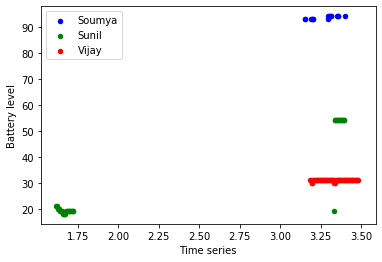

In [124]:
ax = df_soumya.plot(kind='scatter', x='Tseries', y='Level' , color='Blue', label='Soumya')
ax1 = df_sunil.plot(kind='scatter', x='Tseries', y='Level' , color='Green', label='Sunil',ax=ax)
ax2 = df_vijay.plot(kind='scatter', x='Tseries', y='Level' , color='Red', label='Vijay',ax=ax1)
ax2.set_xlabel("Time series")
ax2.set_ylabel("Battery level")

In [125]:
df_compass = pd.read_csv('compas2.csv')

In [115]:
com_vijay = df_compass[['DeviceModel','Heading','Minute','Second']].query('DeviceModel == \'a7y18lte\'')
com_sunil = df_compass[['DeviceModel','Heading','Minute','Second']].query('DeviceModel == \'iPhone12,3\'')
com_soumya = df_compass[['DeviceModel','Heading','Minute','Second']].query('DeviceModel == \'iPhone11,6\'')

In [116]:
com_vijay['Tseries'] = (com_vijay.Minute*60 + com_vijay.Second)/100
com_sunil['Tseries'] = (com_sunil.Minute*60 + com_sunil.Second)/100
com_soumya['Tseries'] = (com_soumya.Minute*60 + com_soumya.Second)/100
com_vijay.drop(axis=1,columns=['DeviceModel','Minute','Second'], inplace=True)
com_sunil.drop(axis=1,columns=['DeviceModel','Minute','Second'], inplace=True)
com_soumya.drop(axis=1,columns=['DeviceModel','Minute','Second'], inplace=True)
com_vijay['Tseries'].head()

0    2.641881
1    2.641948
2    2.641982
3    2.642047
4    2.642087
Name: Tseries, dtype: float64

Text(0, 0.5, 'Compass reading')

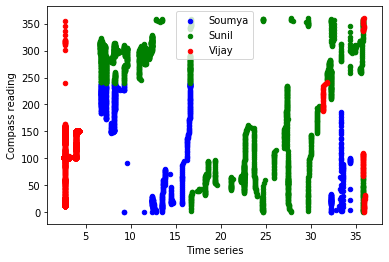

In [117]:
ax = com_soumya.plot(kind='scatter', x='Tseries', y= 'Heading' , color='Blue', label='Soumya')
ax1 = com_sunil.plot(kind='scatter', x='Tseries', y= 'Heading' , color='Green', label='Sunil',ax=ax)
ax2 = com_vijay.plot(kind='scatter', x='Tseries', y= 'Heading' , color='Red', label='Vijay',ax=ax1)
ax2.set_xlabel("Time series")
ax2.set_ylabel("Compass reading")

In [81]:
# Check for data with compass pointing between north(0 degree) and east(90 degree) 
vijay_ne=com_vijay[['Heading']].query('Heading <= 90') # between 0 and
sunil_ne = com_sunil[['Heading']].query('Heading <= 90')
soumya_ne = com_soumya[['Heading']].query('Heading <= 90')
print('Number of times Vijay phone points between North and East :: ',vijay_ne.count() )
print('Number of times Sunil phone points between North and East :: ',sunil_ne.count() )
print('Number of times Soumya phone points between North and East :: ',soumya_ne.count() )

Number of times Vijay phone points between North and East ::  Heading    431
dtype: int64
Number of times Sunil phone points between North and East ::  Heading    599
dtype: int64
Number of times Soumya phone points between North and East ::  Heading    339
dtype: int64


In [82]:
# Function for adding noise to data
def laplaceMechanism(x, epsilon):
    x +=  np.random.laplace(0, 1.0/epsilon, 1)[0]
    return x

In [99]:
vijay_ne['Upd_Heading'] = vijay_ne['Heading'].apply(laplaceMechanism, args=(1,)).apply(np.ceil).astype(int)
sunil_ne['Upd_Heading'] = sunil_ne['Heading'].apply(laplaceMechanism, args=(1,)).apply(np.ceil).astype(int)
soumya_ne['Upd_Heading'] = soumya_ne['Heading'].apply(laplaceMechanism, args=(1,)).apply(np.ceil).astype(int)

In [97]:
vijay_ne.head()

,Heading,Upd_Heading
1725,82.4567,83
1726,83.4567,83
1727,84.4567,86
1728,85.4567,87
1729,86.4567,90


In [100]:
vijay_ne.to_csv('VJUpd_CompassReading.csv',index = False)
sunil_ne.to_csv('SNUpd_CompassReading.csv',index = False)
soumya_ne.to_csv('SMUpd_CompassReading.csv',index = False)

In [102]:
df_acc = pd.read_csv('Acceleration-1.csv')

C:\Users\Vijay S Chauhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
acc_vijay = df_acc[['DeviceModel','X','Y','Z','Minute','Second']].query('DeviceModel == \'a7y18lte\'')
acc_sunil = df_acc[['DeviceModel','X','Y','Z','Minute','Second']].query('DeviceModel == \'iPhone12,3\'')
acc_soumya = df_acc[['DeviceModel','X','Y','Z','Minute','Second']].query('DeviceModel == \'iPhone11,6\'')

In [107]:
acc_vijay.head()

,DeviceModel,X,Y,Z,Minute,Second
0,a7y18lte,-0.268433,0.982666,0.365967,18,7.965654
1,a7y18lte,-0.307739,1.057495,0.364502,18,7.975536
2,a7y18lte,-0.355225,1.079956,0.368530,18,7.985576
3,a7y18lte,-0.410645,1.053711,0.306519,18,7.997480
4,a7y18lte,-0.450317,0.972656,0.200928,18,8.519500


In [108]:
acc_vijay['Tseries'] = (acc_vijay.Minute*60 + acc_vijay.Second)/100
acc_sunil['Tseries'] = (acc_sunil.Minute*60 + acc_sunil.Second)/100
acc_soumya['Tseries'] = (acc_soumya.Minute*60 + acc_soumya.Second)/100
acc_vijay.drop(axis=1,columns=['DeviceModel','Minute','Second'], inplace=True)
acc_sunil.drop(axis=1,columns=['DeviceModel','Minute','Second'], inplace=True)
acc_soumya.drop(axis=1,columns=['DeviceModel','Minute','Second'], inplace=True)
acc_soumya['Tseries'].head()

224191    16.441795
224192    16.442739
224193    16.444750
224194    16.445512
224195    16.445722
Name: Tseries, dtype: float64

Text(0, 0.5, 'X-reading')

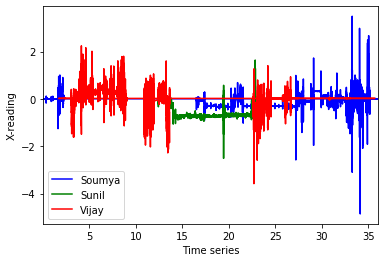

In [111]:
ax = acc_soumya.plot(kind='line', x='Tseries', y= 'X' , color='Blue', label='Soumya')
ax1 = acc_sunil.plot(kind='line', x='Tseries', y= 'X' , color='Green', label='Sunil',ax=ax)
ax2 = acc_vijay.plot(kind='line', x='Tseries', y= 'X' , color='Red', label='Vijay',ax=ax1)
ax2.set_xlabel("Time series")
ax2.set_ylabel("X-reading")

Text(0, 0.5, 'Y-reading')

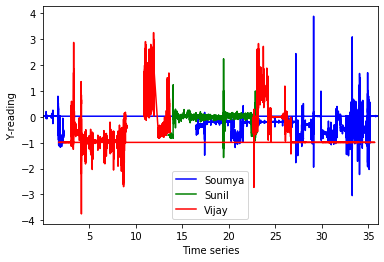

In [112]:
ax = acc_soumya.plot(kind='line', x='Tseries', y= 'Y' , color='Blue', label='Soumya')
ax1 = acc_sunil.plot(kind='line', x='Tseries', y= 'Y' , color='Green', label='Sunil',ax=ax)
ax2 = acc_vijay.plot(kind='line', x='Tseries', y= 'Y' , color='Red', label='Vijay',ax=ax1)
ax2.set_xlabel("Time series")
ax2.set_ylabel("Y-reading")

Text(0, 0.5, 'Z-reading')

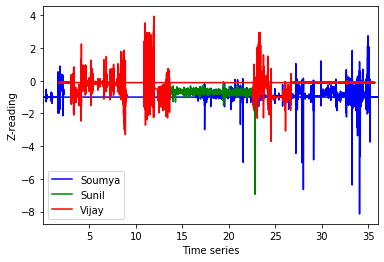

In [113]:
ax = acc_soumya.plot(kind='line', x='Tseries', y= 'Z' , color='Blue', label='Soumya')
ax1 = acc_sunil.plot(kind='line', x='Tseries', y= 'Z' , color='Green', label='Sunil',ax=ax)
ax2 = acc_vijay.plot(kind='line', x='Tseries', y= 'Z' , color='Red', label='Vijay',ax=ax1)
ax2.set_xlabel("Time series")
ax2.set_ylabel("Z-reading")

In [166]:
df_loc = pd.read_csv('gps-location.csv')
loc_vijay = df_loc[['DeviceModel','Latitude','Longitude','Minute','Second']].query('DeviceModel == \'a7y18lte\'')
loc_sunil = df_loc[['DeviceModel','Latitude','Longitude','Minute','Second']].query('DeviceModel == \'iPhone12,3\'')
loc_soumya = df_loc[['DeviceModel','Latitude','Longitude','Minute','Second']].query('DeviceModel == \'iPhone11,6\'')

In [167]:
loc_vijay['Tseries'] = (loc_vijay.Minute*60 + loc_vijay.Second)/100
loc_sunil['Tseries'] = (loc_sunil.Minute*60 + loc_sunil.Second)/100
loc_soumya['Tseries'] = (loc_soumya.Minute*60 + loc_soumya.Second)/100
loc_vijay.drop(axis=1,columns=['DeviceModel','Minute','Second','Tseries'], inplace=True)
loc_sunil.drop(axis=1,columns=['DeviceModel','Minute','Second','Tseries'], inplace=True)
loc_soumya.drop(axis=1,columns=['DeviceModel','Minute','Second','Tseries'], inplace=True)
#loc_sunil['Tseries'].head()

In [168]:
df_loc.head()

,Accuracy,BuildId,DeviceId,DeviceManufacturer,DeviceModel,Id,Latitude,LocalOffsetFromUTC,Longitude,OperatingSystem,...,Formatted Timestamp,Year,Month,Day,Hour,Minute,Second,DayOfWeek,DayOfMonth,DayOfYear
0,13.5,15.18.0,4882779d8b191114,samsung,a7y18lte,bdc9730a-6d5f-4612-8cd8-88a50dec1b7e,35.307136,-04:00:00,-80.723347,Android P,...,05-03-2020 09:45,2020,5,3,9,45,3.311456,6,3,124
1,2.0,15.18.0,4882779d8b191114,samsung,a7y18lte,aebe56f9-e96e-419a-9508-d82200bb068f,35.307210,-04:00:00,-80.723677,Android P,...,05-03-2020 09:45,2020,5,3,9,45,18.145922,6,3,124
2,2.0,15.18.0,4882779d8b191114,samsung,a7y18lte,5d3de273-a6dd-4f4c-bee6-2cb9bc4533fe,35.307210,-04:00:00,-80.723677,Android P,...,05-03-2020 09:45,2020,5,3,9,45,18.335571,6,3,124
3,2.0,15.18.0,4882779d8b191114,samsung,a7y18lte,6017f9a3-1712-408e-9935-0519cb5c3029,35.307168,-04:00:00,-80.723912,Android P,...,05-03-2020 09:45,2020,5,3,9,45,36.128916,6,3,124
4,3.5,15.18.0,4882779d8b191114,samsung,a7y18lte,4755459a-93e8-4e25-b0e5-47da4a2bae98,35.307163,-04:00:00,-80.724464,Android P,...,05-03-2020 09:46,2020,5,3,9,46,22.816380,6,3,124


In [196]:
BBox = (-80.93310426,   -80.6386366,      
         35.133872, 35.3228805)

In [187]:
VBox = (loc_vijay.Longitude.min(),   loc_vijay.Longitude.max(),      
         loc_vijay.Latitude.min(), loc_vijay.Latitude.max())

In [171]:
SBox = (loc_sunil.Longitude.min(),   loc_sunil.Longitude.max(),      
         loc_sunil.Latitude.min(), loc_sunil.Latitude.max())

In [172]:
ABox = (loc_soumya.Longitude.min(),   loc_soumya.Longitude.max(),      
         loc_soumya.Latitude.min(), loc_soumya.Latitude.max())

In [188]:
print(VBox)
print(SBox)

(-80.7486366, -80.7231917, 35.303872, 35.3128805)
(-80.92310426, -80.87606599, 35.14520669, 35.16953272)


In [193]:
chr_img = plt.imread('Charlotte1.png')
vj_img = plt.imread('Vijay.png')
sn_img = plt.imread('Sunil.png')
sm_img = plt.imread('Soumya.png')

Text(0, 0.5, 'Latitude')

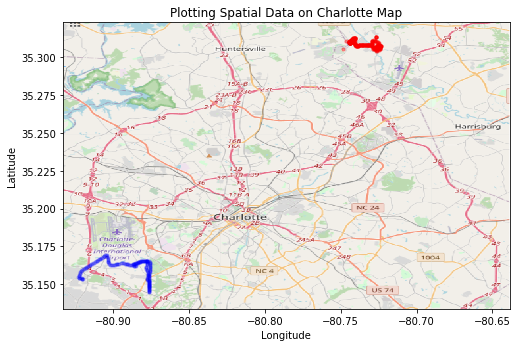

In [198]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(loc_vijay.Longitude, loc_vijay.Latitude, zorder=1, alpha= 0.2, c='r', s=10, label='Vijay')
ax.scatter(loc_sunil.Longitude, loc_sunil.Latitude, zorder=1, alpha= 0.2, c='b', s=10, label='Sunil')
#ax.scatter(loc_soumya.Longitude, loc_soumya.Latitude, zorder=1, alpha= 0.2, c='g', s=10, label='Soumya')
ax.set_title('Plotting Spatial Data on Charlotte Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(chr_img, zorder=0, extent = BBox, aspect= 'equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

Text(0, 0.5, 'Latitude')

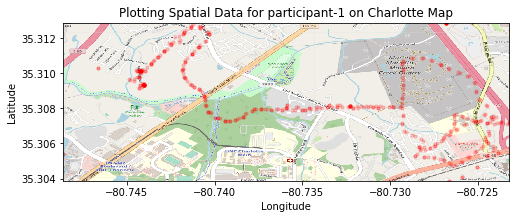

In [176]:
fig, vx = plt.subplots(figsize = (8,7))
vx.scatter(loc_vijay.Longitude, loc_vijay.Latitude, zorder=1, alpha= 0.2, c='r', s=10, label='Vijay')
vx.set_title('Plotting Spatial Data for participant-1 on Charlotte Map')
vx.set_xlim(VBox[0],VBox[1])
vx.set_ylim(VBox[2],VBox[3])
vx.imshow(vj_img, zorder=0, extent = VBox, aspect= 'equal')
vx.set_xlabel("Longitude")
vx.set_ylabel("Latitude")

Text(0, 0.5, 'Latitude')

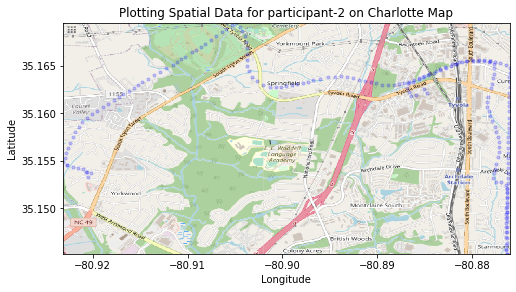

In [177]:
fig, sn = plt.subplots(figsize = (8,7))
sn.scatter(loc_sunil.Longitude, loc_sunil.Latitude, zorder=1, alpha= 0.2, c='b', s=10, label='Sunil')
sn.set_title('Plotting Spatial Data for participant-2 on Charlotte Map')
sn.set_xlim(SBox[0],SBox[1])
sn.set_ylim(SBox[2],SBox[3])
sn.imshow(sn_img, zorder=0, extent = SBox, aspect= 'equal')
sn.set_xlabel("Longitude")
sn.set_ylabel("Latitude")

Text(0, 0.5, 'Latitude')

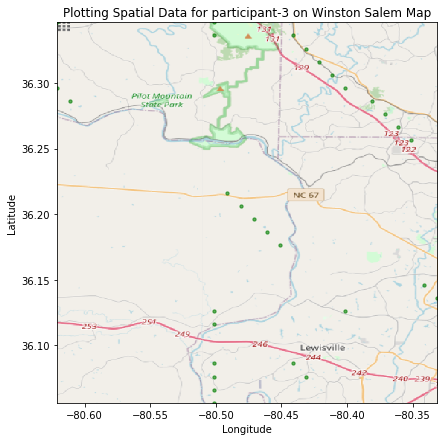

In [178]:
fig, sm = plt.subplots(figsize = (8,7))
sm.scatter(loc_soumya.Longitude, loc_soumya.Latitude, zorder=1, alpha= 0.2, c='g', s=10, label='Soumya')
sm.set_title('Plotting Spatial Data for participant-3 on Winston Salem Map')
sm.set_xlim(ABox[0],ABox[1])
sm.set_ylim(ABox[2],ABox[3])
sm.imshow(sm_img, zorder=0, extent = ABox, aspect= 'equal')
sm.set_xlabel("Longitude")
sm.set_ylabel("Latitude")

In [235]:
df_bluetooth = pd.read_csv('bluetooth1.csv')
bth_dev1 = df_bluetooth[['DeviceModel','Name','Minute','Second']].query('DeviceModel == \'a7y18lte\'')
bth_dev2 = df_bluetooth[['DeviceModel','Name','Minute','Second']].query('DeviceModel == \'OnePlus5\'')

In [236]:
bth_dev1.drop(axis=1,columns=['DeviceModel','Minute','Second'], inplace=True)
bth_dev2.drop(axis=1,columns=['DeviceModel','Minute','Second'], inplace=True)
bth_dev1.head()

,Name,Tseries
103,Living Room,32.417150
104,ZB-Rocker Soulmate 2,32.424923
105,ZB-Rocker Soulmate 2,32.424923
106,ZB-Rocker Soulmate 2,32.424923
107,ZB-Rocker Soulmate 2,32.424923


In [237]:
bth_dev1 = bth_dev1[['Name']].groupby(['Name'])['Name'] \
                         .count() \
                         .reset_index(name='count') \
                         .sort_values(['count'], ascending=False) \
                         .head(5)                                                     

bth_dev2 = bth_dev2[['Name']].groupby(['Name'])['Name'] \
                         .count() \
                         .reset_index(name='count') \
                         .sort_values(['count'], ascending=False) \
                         .head(5)                                                     
                                                      

bth_dev1['Connection_Duration'] = bth_dev1['count'] * 3.6
bth_dev2['Connection_Duration'] = bth_dev2['count'] * 3.6
bth_dev1.drop(axis=1,columns=['count'], inplace=True)
bth_dev2.drop(axis=1,columns=['count'], inplace=True)
bth_dev2.head()

,Name,Connection_Duration
0,iPhone,370.8


In [241]:
bth_dev1

,Name,Connection_Duration
7,ZB-Rocker Soulmate 2,151.2
4,Living Room,21.6
1,Herambâ€™s iPhone,18.0
0,BLE_046A,14.4
5,Living Room speaker,14.4


Text(0, 0.5, 'Connection duration')

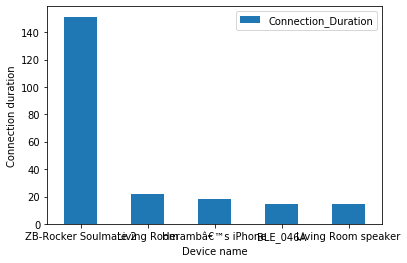

In [240]:
bthx1 = bth_dev1.plot.bar(x='Name', y='Connection_Duration', rot=0)
bthx1.set_xlabel("Device name")
bthx1.set_ylabel("Connection duration")

Text(0, 0.5, 'Connection duration')

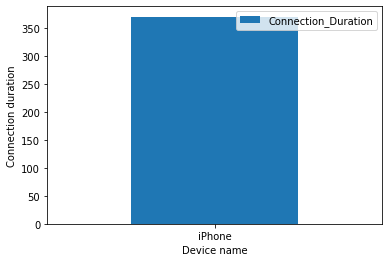

In [239]:
bthx2 = bth_dev2.plot.bar(x='Name', y='Connection_Duration', rot=0)
bthx2.set_xlabel("Device name")
bthx2.set_ylabel("Connection duration")